In [113]:
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

In [43]:
# Read csv file into dataframe
df = pd.read_csv('paysim.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [44]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,"6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00"
mean,243.40,"179,861.90","833,883.10","855,113.67","1,100,701.67","1,224,996.40",0.00,0.00
std,142.33,"603,858.23","2,888,242.67","2,924,048.50","3,399,180.11","3,674,128.94",0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,"13,389.57",0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,"74,871.94","14,208.00",0.00,"132,705.66","214,661.44",0.00,0.00
75%,335.00,"208,721.48","107,315.18","144,258.41","943,036.71","1,111,909.25",0.00,0.00
max,743.00,"92,445,516.64","59,585,040.37","49,585,040.37","356,015,889.35","356,179,278.92",1.00,1.00


In [45]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0,0
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0,0


In [46]:
# Get count of null values per cokumn
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [171]:
#Stepcount fills in the value_count for the default index, starting from 0, so you can check 
#top frequency 19 is the stepcount for head(20) 
df['stepcount'] = df['step'].value_counts()
df['stepcount'][0] = 0
df.tail()
#print(df['stepcount'].sum())
#print(df['stepcount'].value_counts(sort=True).head(5))

C:\Users\19145\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,stepcount
6362615,743,CASH_OUT,"339,682.13",C786484425,"339,682.13",0.00,C776919290,0.00,"339,682.13",1,0,nan
6362616,743,TRANSFER,"6,311,409.28",C1529008245,"6,311,409.28",0.00,C1881841831,0.00,0.00,1,0,nan
6362617,743,CASH_OUT,"6,311,409.28",C1162922333,"6,311,409.28",0.00,C1365125890,"68,488.84","6,379,898.11",1,0,nan
6362618,743,TRANSFER,"850,002.52",C1685995037,"850,002.52",0.00,C2080388513,0.00,0.00,1,0,nan
6362619,743,CASH_OUT,"850,002.52",C1280323807,"850,002.52",0.00,C873221189,"6,510,099.11","7,360,101.63",1,0,nan


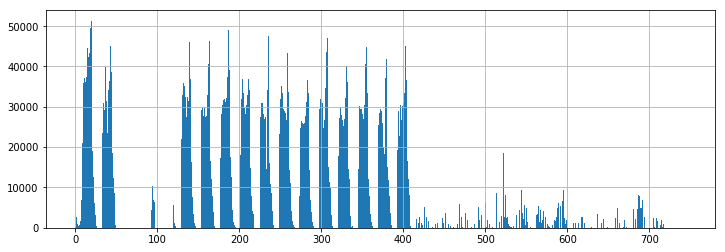

In [196]:
df['step'].hist(figsize=(12,4), bins=743)

19     51352
18     49579
187    49083
235    47491
307    46968
163    46352
139    46054
403    45155
43     45060
355    44787
15     44609
186    43747
306    43615
17     43361
259    43328
16     42471
379    41759
14     41485
42     41304
354    40696
20     40625
162    40622
402    40218
331    40186
36     39774
164    39102
188    39079
44     38523
380    37693
9      37628
13     37515
185    37323
11     37241
378    37127
236    37109
140    37012
308    36983
211    36889
204    36856
404    36726
330    36682
283    36644
131    36375
41     36348
203    36176
332    36156
12     36153
10     35991
132    35936
252    35590
Name: step, dtype: int64


Text(0, 0.5, 'transaction count')

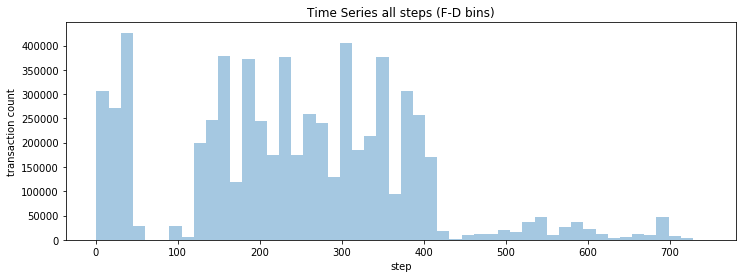

In [179]:
# Check frequency of step, which represents an hour time interval.  
# All periods have some transaction, and there is a cluster of periods with the most activity. 
print(df['step'].value_counts(sort=True).head(50))
#print(df['step'].value_counts(sort=True).tail(5))
#print(df['step'].value_counts().describe())
#print(df['step'].nunique())
#df['step'].value_counts().hist()
#plt.axvline(df['step'].value_counts().mean(), color='k', linestyle='dashed', linewidth=1)
#df['stepcount'].hist()
#plt.axvline(df['step'].value_counts().mean(), linestyle='dashed')
#plt.axvline(df['step'].value_counts().median(), linestyle='dashed', color='k')
#plt.show()
#df['step'].value_counts().plot(kind='bar')
#plt.axvline(df['step'].value_counts().mean(), linestyle='dotted', linewidth=100)
#plt.axvline(df['step'].value_counts().median(), linestyle='dashed', color='k')
#plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAuoAAAEWCAYAAAAw37JZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3X2cZVV95/vPN40gRqB5aA3SIBjaKJqxlRbIdeIoGGwYxzZejaCjrcG08cJEo5kBnNzBhxAlD6KMhlyiaKMBJBiHDsFgixLNRFsaRRTQoYMIHRAamkcRDPC7f+xVcixOVZ1q6lSd6v68X6/zOnv/9tprr7OqGn5n1dprp6qQJEmSNFp+Ya4bIEmSJOnRTNQlSZKkEWSiLkmSJI0gE3VJkiRpBJmoS5IkSSPIRF2SJEkaQSbqkrYJSd6V5GNz3Y7pSvLrSb4/y9e8NMmb2/Ybk/zTbF7/sUryliQfmsXrXZ/kJRMcm5GfX5JvJHnWY61H0vxioi5pq5Dk3p7Xw0l+0rP/uqr646p68yy15Zgk30tyT5Jbkvx9kp22pK6q+mpV/cpMt3HYepP9Wb7u9sAfAn/a9vdNUuN+P749yfmV5Met3O1JLknymi1tzwz+/P4MeO8M1CNpHtlurhsgSTOhqp44tp3keuDNVfXF2W5Hkv8A/DGwvKq+lWQ34D9tYV3bVdWDM9rArd8K4HtV9a/j4gun0ZfPqaoNSfYAjgA+kuQZVfWeGW3p9KwB/jLJnlV18xy2Q9IsckRd0jYhybuTfLptj42yvinJjUnuSPK7SZ6f5Mokdyb5yLjzfzvJNa3sxUmeOsGlng98raq+BVBVm6tqdVXd0+rZIcmfJbmhjbb/ZZId27EXJdmY5PgkPwI+MRbracdTknw2yaYkP0jyez3HDkqyPsndre4PTtAXuya5sNVxR9tevAV9+vgkn24jz3cmuSzJk5OcDPw6XYJ771hfJnlGkrVJNif5fpLf6qnrk60v1ra/RPzjWB+nc2qSW5Pc1X5Gz56gWUcA/zjdz9JPVd1WVZ8C3gqcmGT3SYo/P8nVrT8/keTxre3jf37XJ/mD9hnuSvKZnrJ7tJ/Fna2PvprkF1pb7gcuBw6fic8maX4wUZe0LTsYWAK8BvgQ8N+BlwDPAn6rjY6T5BXAu4BXAouArwLnTFDnOuClSd6T5AVJdhh3/BTg6cBSYH9gL+B/9Bz/JWA34KnAqt4TW9L2d8C323mHAW9P8tJW5MPAh6tqZ+CXgfMmaOMvAJ9o19gH+AnwkQnKTmYlsAuwN7A78LvAT6rqv9P10XFV9cSqOi7JLwJrgbOBJwFHA3+Rn593/TrgfcAewBXAX7f44cAL6fptId3P6/YJ2vSrwEzP6b+A7i/QB01S5nXAS+n6/el0028m8lvAcmA/4N8Bb2zxdwIb6X7Hnkz3O1c9510DPGfarZc0b5moS9qWva+q7q+qLwA/Bs6pqlvbtImvAs9t5d4CvL+qrmnTJ/4YWNpvVL2qvkqX0D8P+Hvg9iQfTLIgSYDfAX6/jbTf0+o6qqeKh4GTquqBqvrJuOqfDyyqqvdW1U+r6jrgr3rO/zdg/yR7VNW9VfX1fh+6qm6vqs9W1X2tDScD/2E6Hddzvd2B/avqoaq6vKrunqDsy4Drq+oTVfVgVX0T+Czwqp4yf19VX6mqB+i+NP1akr3bdXYCngGk/Rwmmv6xELinT/y2NlJ9Z5I/mM6HrKp/A26j+wI1kY9U1Y1VtZmuP4+epOxpVXVTK/t3dF/aoPucewJPrap/a/PbexP1e+g+n6RthIm6pG3ZLT3bP+mzPzbv/anAh8cSPWAzELpR7Uepqs9X1X+iS+xW0I2YvplupPQJwOU9df1Di4/Z1KY59PNU4Ck9CeeddKOuT27Hj6Ebzf1em4bysn6VJHlCkv8vyQ+T3A18BViYZMEE153Ip4CLgXOT3JTkT5I8bpK2Hzyu7a+j+wvCmBvHNqrqXrp+fkpVfYluxP+jwC1Jzkiy8wTXuYMuqR9vj6pa2F5/BpDkqjxyg+mvT/Qh22da1NozkRt7tn8IPGWSsj/q2b6PR37P/hTYAHwhyXVJThh33k7AnZPUK2krY6IuSVO7EXhLT6K3sKp2rKp/nuykqnq4qi4BvgQ8m25U9ifAs3rq2aX3Rlh+fqpDv3b8YFw7dqqqI9v1rq2qo+mmlpwCnN+mnIz3TuBXgIPbNJkXtnim7Imf/3z/VlXvqaoDgP+LbtT8DRN8jhuBfxzX9idW1Vt7yuw9tpHkiXRfdG5q1zqtqg6km5b0dOC/TtCsK9vxQdr/rNaGJ7a/hExkBfAg8I1Jyuzds73PWLuno6ruqap3VtXT6G5AfkeSw3qKPJNu2pOkbYSJuiRN7S/pbiZ8FkCSXZK8ul/BJCuSHNVu2EySg+imlXy9qh6mm6pyapIntfJ79cwxn8o3gLvT3Wy6Y5tO8+wkz291/ecki9p1xkZeH+pTz050XxjuTLcqzUkDXn/8Z31xkl9tI/F3003dGLveLcDTeopfCDw9yeuTPK69np/kmT1ljkzy79Mtsfg+YF1V3djKHdxGtn8M3D/B5wK4iC2bxtPv8+2W5HV0I/mnVNVE8+IBjk2yuPXnu4DPbMH1XpZk/zZF6m66z/hQO7YDcCDdPH9J2wgTdUmaQlV9jm6E+tw2VeS7dKuL9HMH3Tz0a+mSrU8Df1pVYzdGHk83veHrra4v0o1uD9KOh+hGWpcCP6Abof8Y3Q2d0N2geFWSe+luLD1qgmk0HwJ2bOd/nW76zZb4JeB8us95Dd1qK59uxz4MvKqtgnJamwt/ON18+pvopn+cAvTebHs23ZeGzXRJ6etafGe6Lzh30E0ruZ1uXfF+/g54RpLJpp5M5dutDzfQTVn6/ar6H1OcczbwBeC69vqjLbjuErrfh3uBrwF/UVWXtmMvBy6tqmmP1Euav/Lz96lIkjT7knwS2FhVk62WMmhdq4ADqurtj7lhIyLJOuCYqvruXLdF0uzxgUeSpK1KVZ0x122YaVV18Fy3QdLsc+qLJEmSNIKc+iJJkiSNIEfUJUmSpBHkHPVmjz32qH333XeumyFJkqSt3OWXX35bVS2aqpyJerPvvvuyfv36uW6GJEmStnJJfjhIOae+SJIkSSPIRF2SJEkaQSbqkiRJ0ggyUZckSZJGkIm6JEmSNIJM1CVJkqQRZKIuSZIkjSATdUmSJGkEmahLkiRJI8gnk24Dzl53w7TKv/bgfYbUEkmSJA3KEXVJkiRpBJmoS5IkSSPIRF2SJEkaQSbqkiRJ0ggyUZckSZJGkIm6JEmSNIJM1CVJkqQRZKIuSZIkjaChJ+pJFiT5VpIL2/5+SdYluTbJZ5Js3+I7tP0N7fi+PXWc2OLfT/LSnvjyFtuQ5ISeeN9rSJIkSfPFbDyZ9G3ANcDObf8U4NSqOjfJXwLHAKe39zuqav8kR7Vyr0lyAHAU8CzgKcAXkzy91fVR4DeAjcBlSdZU1dWTXEOShsanAEuSZtJQR9STLAb+I/Cxth/gUOD8VmQ18Iq2vaLt044f1sqvAM6tqgeq6gfABuCg9tpQVddV1U+Bc4EVU1xDkiRJmheGPfXlQ8B/Ax5u+7sDd1bVg21/I7BX294LuBGgHb+rlf9ZfNw5E8Unu4YkSZI0LwwtUU/yMuDWqrq8N9ynaE1xbKbi/dq4Ksn6JOs3bdrUr4gkSZI0J4Y5ov4C4OVJrqeblnIo3Qj7wiRjc+MXAze17Y3A3gDt+C7A5t74uHMmit82yTV+TlWdUVXLqmrZokWLtvyTSpIkSTNsaIl6VZ1YVYural+6m0G/VFWvA74MvKoVWwlc0LbXtH3a8S9VVbX4UW1VmP2AJcA3gMuAJW2Fl+3bNda0cya6hiRJkjQvzMU66scD70iygW4++cdb/OPA7i3+DuAEgKq6CjgPuBr4B+DYqnqozUE/DriYblWZ81rZya4hSZIkzQuzsTwjVXUpcGnbvo5uxZbxZe4HXj3B+ScDJ/eJXwRc1Cfe9xqSJEnSfOGTSSVJkqQRZKIuSZIkjSATdUmSJGkEmahLkiRJI8hEXZIkSRpBs7Lqi7StO3vdDdMq/9qD9xlSSyRJ0nxhoi5pKPxyMvem+zMAfw6SNEqc+iJJkiSNIEfUpa2AI6eSJG19HFGXJEmSRpCJuiRJkjSCTNQlSZKkEWSiLkmSJI0gE3VJkiRpBJmoS5IkSSPIRF2SJEkaQUNL1JM8Psk3knw7yVVJ3tPin0zygyRXtNfSFk+S05JsSHJlkuf11LUyybXttbInfmCS77RzTkuSFt8tydpWfm2SXYf1OSVJkqRhGOaI+gPAoVX1HGApsDzJIe3Yf62qpe11RYsdASxpr1XA6dAl3cBJwMHAQcBJPYn36a3s2HnLW/wE4JKqWgJc0vYlSZKkeWNoiXp17m27j2uvmuSUFcBZ7byvAwuT7Am8FFhbVZur6g5gLV3Svyewc1V9raoKOAt4RU9dq9v26p64JEmSNC8MdY56kgVJrgBupUu217VDJ7fpLacm2aHF9gJu7Dl9Y4tNFt/YJw7w5Kq6GaC9P2mC9q1Ksj7J+k2bNm3x55QkSZJm2lAT9ap6qKqWAouBg5I8GzgReAbwfGA34PhWPP2q2IL4dNp3RlUtq6plixYtms6pkiRJ0lDNyqovVXUncCmwvKpubtNbHgA+QTfvHLoR8b17TlsM3DRFfHGfOMAtbWoM7f3WGf1AkiRJ0pANc9WXRUkWtu0dgZcA3+tJoEM3d/y77ZQ1wBva6i+HAHe1aSsXA4cn2bXdRHo4cHE7dk+SQ1pdbwAu6KlrbHWYlT1xSZIkaV7Yboh17wmsTrKA7gvBeVV1YZIvJVlEN3XlCuB3W/mLgCOBDcB9wJsAqmpzkvcBl7Vy762qzW37rcAngR2Bz7cXwAeA85IcA9wAvHpon1KSJEkagqEl6lV1JfDcPvFDJyhfwLETHDsTOLNPfD3w7D7x24HDptlkSZIkaWT4ZFJJkiRpBJmoS5IkSSPIRF2SJEkaQSbqkiRJ0ggyUZckSZJGkIm6JEmSNIJM1CVJkqQRZKIuSZIkjSATdUmSJGkEmahLkiRJI8hEXZIkSRpBJuqSJEnSCDJRlyRJkkbQlIl6krcNEpMkSZI0cwYZUV/ZJ/bGGW6HJEmSpB7bTXQgydHAa4H9kqzpObQTcPtUFSd5PPAVYId2nfOr6qQk+wHnArsB3wReX1U/TbIDcBZwYKv/NVV1favrROAY4CHg96rq4hZfDnwYWAB8rKo+0OJ9rzFQj8yys9fdMO1zXnvwPkNoiSRN33T/G+Z/vyRpcBMm6sA/AzcDewB/3hO/B7hygLofAA6tqnuTPA74pySfB94BnFpV5yb5S7oE/PT2fkdV7Z/kKOAU4DVJDgCOAp4FPAX4YpKnt2t8FPgNYCNwWZI1VXV1O7ffNSRJkqR5YcKpL1X1w6q6tKp+rar+sef1zap6cKqKq3Nv231cexVwKHB+i68GXtG2V7R92vHDkqTFz62qB6rqB8AG4KD22lBV17XR8nOBFe2cia4hSZIkzQuD3Ez6yiTXJrkryd1J7kly9yCVJ1mQ5ArgVmAt8C/AnT2J/kZgr7a9F3AjQDt+F7B7b3zcORPFd5/kGuPbtyrJ+iTrN23aNMhHkiRJkmbFIDeT/gnw8qrapap2rqqdqmrnQSqvqoeqaimwmG4E/Jn9irX3THBspuL92ndGVS2rqmWLFi3qV0SSJEmaE4Mk6rdU1TWP5SJVdSdwKXAIsDDJ2Nz4xcBNbXsjsDdAO74LsLk3Pu6cieK3TXINSZIkaV4YJFFfn+QzSY5u02BemeSVU52UZFGShW17R+AlwDXAl4FXtWIrgQva9hoeWQryVcCXqqpa/KgkO7TVXJYA3wAuA5Yk2S/J9nQ3nK5p50x0DUmSJGlemGzVlzE7A/cBh/fECvjbKc7bE1idZAHdF4LzqurCJFcD5yb5I+BbwMdb+Y8Dn0qygW4k/SiAqroqyXnA1cCDwLFV9RBAkuOAi+mWZzyzqq5qdR0/wTUkSZKkeWHKRL2q3rQlFVfVlcBz+8Svo5uvPj5+P/DqCeo6GTi5T/wi4KJBryFJkiTNF1Mm6kk+QZ+bMavqt4fSIkmSJEkDTX25sGf78cBv4s2ZkiRJ0lANMvXls737Sc4Bvji0FkmSJEkaaNWX8ZYA+8x0QyRJkiQ9YpA56vfwyIOECvgR3aoqkiRJkoZkkKkvO81GQyRJkiQ9YpCbSUnycuCFbffSqrpwsvKSJEmSHpsp56gn+QDwNroHDl0NvC3J+4fdMEmSJGlbNsiI+pHA0qp6GCDJarqnfZ44zIZpYmevu2GumyBJkqQhG3TVl4U927sMoyGSJEmSHjHIiPr7gW8l+TLdyi8vxNF0SZIkaagGWfXlnCSXAs+nS9SPr6ofDbthkiRJ0rZskJtJfxO4r6rWVNUFwP1JXjH8pkmSJEnbrkHmqJ9UVXeN7VTVncBJw2uSJEmSpEHmqPdL5gdaf12ShmVLVj967cH7DKElkiQNxyAJ9/okHwQ+ChTwX4DLpzopyd7AWcAvAQ8DZ1TVh5O8G/gdYFMr+q6quqidcyJwDPAQ8HtVdXGLLwc+DCwAPlZVH2jx/YBzgd2AbwKvr6qfJtmhXftA4HbgNVV1/QCfVZI0RNP9guWXK0nbskGmvvwX4KfAZ4DzgJ8Axw5w3oPAO6vqmcAhwLFJDmjHTq2qpe01lqQfABwFPAtYDvxFkgVJFtB9STgCOAA4uqeeU1pdS4A76JJ82vsdVbU/cGorJ0mSJM0bg6z68mPghOlWXFU3Aze37XuSXAPsNckpK4Bzq+oB4AdJNgAHtWMbquo6gCTnAitafYcCr21lVgPvBk5vdb27xc8HPpIkVVXT/RySJEnSXBj0gUePSZJ9gecC61rouCRXJjkzya4tthdwY89pG1tsovjuwJ1V9eC4+M/V1Y7f1cqPb9eqJOuTrN+0adP4w5IkSdKcGXqinuSJwGeBt1fV3XQj3r8MLKUbcf/zsaJ9Tq8tiE9W188Hqs6oqmVVtWzRokWTfg5JkiRpNg119ZYkj6NL0v+6qv4WoKpu6Tn+V8CFbXcjsHfP6YuBm9p2v/htwMIk27VR897yY3VtTLIdsAuweQY/mrZxW7LiiCRJ0nRMmagnWUS3Ssu+veWr6renOC/Ax4FrquqDPfE92/x1gN8Evtu21wBntxVmngIsAb5BNzq+pK3w8q90N5y+tqoqyZeBV9Gt/LISuKCnrpXA19rxLzk/Xfp5rr4hSdJoG2RE/QLgq8AX6ZZNHNQLgNcD30lyRYu9i27VlqV0U1GuB94CUFVXJTkPuJpuxZhjq+ohgCTHARfTLc94ZlVd1eo7Hjg3yR8B36L7YkB7/1S7IXUzXXIvSZIkzRuDJOpPqKrjp1txVf0T/eeKXzTJOScDJ/eJX9TvvLYSzEF94vcDr55OeyVt/fwrgiRpPhnkZtILkxw59JZIkiRJ+plBEvW30SXr9ye5p73uHnbDJEmSpG3ZIA882mk2GiJJkiTpEQMtz5jk5cAL2+6lVXXhZOUlSZIkPTZTTn1J8gG66S9Xt9fbWkySJEnSkAwyon4ksLSqHgZIsppuKcQThtkwSZIkaVs2yM2kAAt7tncZRkMkSZIkPWKQEfX3A99qTwEN3Vz1E4faKkmSJGkbN8iqL+ckuRR4Pl2ifnxV/WjYDZMkSZK2ZRNOfUnyjPb+PGBPYCNwI/CUFpMkSZI0JJONqL8DWAX8eZ9jBRw6lBZJkiRJmjhRr6pVbfOIqrq/91iSxw+1VZIkSdI2bpCbSf8ZGD/VpV9MkjREZ6+7Ya6bIEmaRRMm6kl+CdgL2DHJc+luJAXYGXjCLLRNkiRJ2mZNNqL+UuCNwGK6eepjifrdwLuG2yxJkiRp2zbhqi9VtbqqXgy8saoOraoXt9eKqvrbqSpOsneSLye5JslVSd7W4rslWZvk2va+a4snyWlJNiS5sndlmSQrW/lrk6zsiR+Y5DvtnNOSZLJrSJIkSfPFIE8mPTDJz55MmmTXJH80wHkPAu+sqmcChwDHJjkAOAG4pKqWAJe0fYAjgCXttQo4vV1vN+Ak4GDgIOCknsT79FZ27LzlLT7RNSRJkqR5YZBE/YiqunNsp6ruAI6c6qSqurmqvtm27wGuoZvzvgJY3YqtBl7RtlcAZ1Xn68DCJHvSTcFZW1Wb27XXAsvbsZ2r6mtVVcBZ4+rqdw1JkiRpXhgkUV+QZIexnSQ7AjtMUv5RkuwLPBdYBzy5qm6GLpkHntSK7UX3QKUxG1tssvjGPnEmuYYkSZI0LwyyPOOngUuSfILuQUe/zSOj1VNK8kTgs8Dbq+ruNo28b9E+sdqC+MCSrKKbOsM+++wznVO1lXHZO0mSNGqmHFGvqj8BTgaeCTwLeF+LTSnJ4+iS9L/uuQH1ljZthfZ+a4tvBPbuOX0xcNMU8cV94pNdY/xnO6OqllXVskWLFg3ykSRJkqRZMcjUF6rq81X1B1X1zqq6eJBz2gosHweuqaoP9hxaA4yt3LISuKAn/oa2+sshwF1t2srFwOHtJtZdgcOBi9uxe5Ic0q71hnF19buGJEmSNC9MOfWlJc3/k25EfXtgAfDjqtp5ilNfALwe+E6SK1rsXcAHgPOSHAPcALy6HbuI7ibVDcB9wJsAqmpzkvcBl7Vy762qzW37rcAngR2Bz7cXk1xDkiRJmhcGmaP+EeAo4G+AZXQj1/tPdVJV/RP955EDHNanfAHHTlDXmcCZfeLrgWf3id/e7xqSJEnSfDFIok5VbUiyoKoeAj6R5J+H3C5JkiRpmzZIon5fku2BK5L8CXAz8IvDbZYkSZK0bRskUX893U2nxwG/T7cCy/89zEZJ0rbAZUElSZOZMlGvqh+2zfuTnAbsXVUbhtssSZIkads25fKMSS5NsnOS3YBv081R/+BU50mSJEnacoOso75LVd0NvBL4RFUdCLxkuM2SJEmStm2DJOrbtad7/hZw4ZDbI0mSJInBbiZ9L93TQf+pqi5L8jTg2uE2S9KoGfaNj95YKUnSzxvkZtK/oXvY0dj+dbjqiyRJkjRUUybqSRYBvwPs21u+qn57eM2SJGn6f2l57cH7DKklkjT7Bpn6cgHwVeCLwEPDbY4kSZIkGCxRf0JVHT/0lkiSJEn6mUFWfbkwyZFDb4kkSZKknxkkUX8bXbL+kyR3J7knyd3DbpgkSZK0LRtk1ZedZqMhkiRJkh4xyBx1kuwKLAEePxarqq8Mq1GSJEnStm7KqS9J3gx8he6hR+9p7+8e4Lwzk9ya5Ls9sXcn+dckV7TXkT3HTkyyIcn3k7y0J768xTYkOaEnvl+SdUmuTfKZJNu3+A5tf0M7vu8gHSFJkiSNkkHnqD8f+GFVvRh4LrBpgPM+CSzvEz+1qpa210UASQ4AjgKe1c75iyQLkiwAPgocARwAHN3KApzS6loC3AEc0+LHAHdU1f7Aqa2cJEmSNK8MkqjfX1X3QzdaXVXfA35lqpPa1JjNA7ZjBXBuVT1QVT8ANgAHtdeGqrquqn4KnAusSBLgUOD8dv5q4BU9da1u2+cDh7XykiRJ0rwxSKK+MclC4H8Ba5NcANz0GK55XJIr29SYXVtsL+DG3mu22ETx3YE7q+rBcfGfq6sdv6uVf5Qkq5KsT7J+06ZB/kggSZIkzY4pE/Wq+s2qurOq3g38v8DHeWT0erpOB34ZWArcDPx5i/cb8a4tiE9W16ODVWdU1bKqWrZo0aLJ2i1JkiTNqklXfUnyC8CVVfVsgKr6x8dysaq6pafuvwIubLsbgb17ii7mkVH7fvHbgIVJtmuj5r3lx+ramGQ7YBcGn4IjSZIkjYRJR9Sr6mHg20n2mYmLJdmzZ/c3gbEVYdYAR7UVW/ajWwryG8BlwJK2wsv2dDecrqmqAr4MvKqdvxK4oKeulW37VcCXWnlJkiRp3hhkHfU9gauSfAP48Viwql4+2UlJzgFeBOyRZCNwEvCiJEvppqJcD7yl1XVVkvOAq4EHgWOr6qFWz3F0S0IuAM6sqqvaJY4Hzk3yR8C36Kbk0N4/lWQD3Uj6UQN8RkmSJGmkDJKov2dLKq6qo/uEP94nNlb+ZODkPvGLgIv6xK+jWxVmfPx+4NXTaqwkSZI0YgZJ1I+squN7A0lOAR7TfHVJkiRJExtkecbf6BM7YqYbIkmSJOkRE46oJ3kr8P8AT0tyZc+hnYD/PeyGSZIkSduyyaa+nA18Hng/cEJP/J6qcrlDSZIkaYgmTNSr6i66p3r2uylUkrZ6Z6+7Ya6bIEnahg0yR12SJEnSLDNRlyRJkkaQibokSZI0gkzUJUmSpBE0yAOPJM0yb2KUJEmOqEuSJEkjyERdkiRJGkEm6pIkSdIIMlGXJEmSRpCJuiRJkjSChpaoJzkzya1JvtsT2y3J2iTXtvddWzxJTkuyIcmVSZ7Xc87KVv7aJCt74gcm+U4757QkmewakiRJ0nwyzBH1TwLLx8VOAC6pqiXAJW0f4AhgSXutAk6HLukGTgIOBg4CTupJvE9vZcfOWz7FNSRJkqR5Y2iJelV9Bdg8LrwCWN22VwOv6ImfVZ2vAwuT7Am8FFhbVZur6g5gLbC8Hdu5qr5WVQWcNa6ufteQJEmS5o3ZnqP+5Kq6GaC9P6nF9wJu7Cm3scUmi2/sE5/sGo+SZFWS9UnWb9q0aYs/lCRJkjTTRuVm0vSJ1RbEp6WqzqiqZVW1bNGiRdM9XZIkSRqa2U7Ub2nTVmjvt7b4RmDvnnKLgZumiC/uE5/sGpIkSdK8sd0sX28NsBL4QHu/oCd+XJJz6W4cvauqbk5yMfDHPTeQHg6cWFWbk9yT5BBgHfAG4H9OcQ1J0hTOXnfDXDdBktQMLVFPcg7wImCPJBvpVm/5AHBekmOAG4BXt+IXAUcCG4D7gDcBtIT8fcBlrdx7q2rsBtW30q0ssyPw+fZikmtIkiRJ88bQEvWqOnqCQ4f1KVvAsRPUcyZwZp/4euDZfeK397uGJEmSNJ+Mys2kkiRJknqYqEuSJEkjyERdkiRJGkEm6pIkSdIIMlGXJEmSRpCJuiRJkjSCTNQlSZKkEWSiLkmSJI1czXhvAAAKW0lEQVQgE3VJkiRpBJmoS5IkSSPIRF2SJEkaQSbqkiRJ0ggyUZckSZJGkIm6JEmSNIJM1CVJkqQRNCeJepLrk3wnyRVJ1rfYbknWJrm2ve/a4klyWpINSa5M8ryeela28tcmWdkTP7DVv6Gdm9n/lJIkSdKWm8sR9RdX1dKqWtb2TwAuqaolwCVtH+AIYEl7rQJOhy6xB04CDgYOAk4aS+5bmVU95y0f/seRJEmSZs4oTX1ZAaxu26uBV/TEz6rO14GFSfYEXgqsrarNVXUHsBZY3o7tXFVfq6oCzuqpS5IkSZoX5ipRL+ALSS5PsqrFnlxVNwO09ye1+F7AjT3nbmyxyeIb+8QlSZKkeWO7ObruC6rqpiRPAtYm+d4kZfvNL68tiD+64u5LwiqAffbZZ/IWS5IkSbNoThL1qrqpvd+a5HN0c8xvSbJnVd3cpq/c2opvBPbuOX0xcFOLv2hc/NIWX9ynfL92nAGcAbBs2bK+ybwkSZqes9fdMK3yrz3YwbL5Zro/Y/DnvCVmfepLkl9MstPYNnA48F1gDTC2cstK4IK2vQZ4Q1v95RDgrjY15mLg8CS7tptIDwcubsfuSXJIW+3lDT11SZIkSfPCXIyoPxn4XFsxcTvg7Kr6hySXAeclOQa4AXh1K38RcCSwAbgPeBNAVW1O8j7gslbuvVW1uW2/FfgksCPw+faSJEmS5o1ZT9Sr6jrgOX3itwOH9YkXcOwEdZ0JnNknvh549mNurCRJkjRHRml5RkmSJEnNXK36IkmS5oEtuWlw1Hhzq+YrR9QlSZKkEWSiLkmSJI0gE3VJkiRpBDlHXY8yanP5fKiCJEnaFpmoS5KkeWVruMFVGoRTXyRJkqQR5Ii6JElSD6dcalSYqEuSNI+N2n1FkmaOibokaath0ippa2KiLknSNsQbMaX5w5tJJUmSpBHkiLokSUPkCPa2YdSmXY1ae7RlTNQlSZoGE++ZZ5/OPX8Go8lEXZIkSUPnKP/0bbWJepLlwIeBBcDHquoDc9wkzSJHBiRJWxP/v7Zt2ioT9SQLgI8CvwFsBC5Lsqaqrp7blkmSJJl4D8IR+K00UQcOAjZU1XUASc4FVgAm6pKknzFZkjTKttZEfS/gxp79jcDB4wslWQWsarv3Jvn+LLRtvD2A2+bgujPmdXPdgM6878cRYT/ODPtxZtiPM8N+nBn248wYWj+OSD4yqKcOUmhrTdTTJ1aPClSdAZwx/OZMLMn6qlo2l23YGtiPM8N+nBn248ywH2eG/Tgz7MeZYT9Oz9b6wKONwN49+4uBm+aoLZIkSdK0ba2J+mXAkiT7JdkeOApYM8dtkiRJkga2VU59qaoHkxwHXEy3POOZVXXVHDdrInM69WYrYj/ODPtxZtiPM8N+nBn248ywH2eG/TgNqXrU1G1JkiRJc2xrnfoiSZIkzWsm6pIkSdIIMlGfI0mWJ/l+kg1JTpjr9oyyJGcmuTXJd3tiuyVZm+Ta9r5riyfJaa1fr0zyvLlr+WhJsneSLye5JslVSd7W4vblNCR5fJJvJPl268f3tPh+Sda1fvxMu5GdJDu0/Q3t+L5z2f5Rk2RBkm8lubDt24/TlOT6JN9JckWS9S3mv+tpSrIwyflJvtf+O/lr9uP0JPmV9ns49ro7ydvtxy1noj4HkiwAPgocARwAHJ3kgLlt1Uj7JLB8XOwE4JKqWgJc0vah69Ml7bUKOH2W2jgfPAi8s6qeCRwCHNt+7+zL6XkAOLSqngMsBZYnOQQ4BTi19eMdwDGt/DHAHVW1P3BqK6dHvA24pmffftwyL66qpT3rU/vvevo+DPxDVT0DeA7d76X9OA1V9f32e7gUOBC4D/gc9uMWM1GfGwcBG6rquqr6KXAusGKO2zSyquorwOZx4RXA6ra9GnhFT/ys6nwdWJhkz9lp6Wirqpur6ptt+x66/wnthX05La0/7m27j2uvAg4Fzm/x8f041r/nA4cl6fdQtm1OksXAfwQ+1vaD/ThT/Hc9DUl2Bl4IfBygqn5aVXdiPz4WhwH/UlU/xH7cYibqc2Mv4Mae/Y0tpsE9uapuhi4BBZ7U4vbtANq0gecC67Avp61N17gCuBVYC/wLcGdVPdiK9PbVz/qxHb8L2H12WzyyPgT8N+Dhtr879uOWKOALSS5PsqrF/Hc9PU8DNgGfaFOxPpbkF7EfH4ujgHPatv24hUzU50a/USDXyZwZ9u0UkjwR+Czw9qq6e7KifWL2JVBVD7U/7S6m+wvZM/sVa+/2Yx9JXgbcWlWX94b7FLUfp/aCqnoe3TSCY5O8cJKy9mN/2wHPA06vqucCP+aR6Rn92I+TaPeWvBz4m6mK9onZjz1M1OfGRmDvnv3FwE1z1Jb56paxP4+191tb3L6dRJLH0SXpf11Vf9vC9uUWan8av5Ruzv/CJGMPkevtq5/1Yzu+C4+eyrUtegHw8iTX003/O5RuhN1+nKaquqm930o3H/gg/Hc9XRuBjVW1ru2fT5e4249b5gjgm1V1S9u3H7eQifrcuAxY0lY32J7uz0Nr5rhN880aYGXbXglc0BN/Q7uT/BDgrrE/t23r2nzejwPXVNUHew7Zl9OQZFGShW17R+AldPP9vwy8qhUb349j/fsq4Evlk+aoqhOranFV7Uv338AvVdXrsB+nJckvJtlpbBs4HPgu/ruelqr6EXBjkl9pocOAq7Eft9TRPDLtBezHLeaTSedIkiPpRo8WAGdW1clz3KSRleQc4EXAHsAtwEnA/wLOA/YBbgBeXVWbWzL6EbpVYu4D3lRV6+ei3aMmyb8Hvgp8h0fmBL+Lbp66fTmgJP+O7maoBXSDHedV1XuTPI1uZHg34FvAf66qB5I8HvgU3T0Bm4Gjquq6uWn9aEryIuAPqupl9uP0tP76XNvdDji7qk5Osjv+u56WJEvpbmzeHrgOeBPt3zj248CSPIFu3vnTququFvP3cQuZqEuSJEkjyKkvkiRJ0ggyUZckSZJGkIm6JEmSNIJM1CVJkqQRZKIuSZIkjSATdUnSQJK8vS29JkmaBS7PKEkaSHuK6LKqum2u2yJJ24Ltpi4iSdrWtKdcnkf3SO8FwN8ATwG+nOS2qnpxksOB9wA7AP9C97CSe1tC/xngxa2611bVhtn+DJI03zn1RZLUz3Lgpqp6TlU9m+5JyjcBL25J+h7AHwIvqarnAeuBd/Scf3dVHUT31MEPzXLbJWmrYKIuSernO8BLkpyS5NfHHgXe4xDgAOB/J7kCWAk8tef4OT3vvzb01krSVsipL5KkR6mq/5PkQOBI4P1JvjCuSIC1VXX0RFVMsC1JGpAj6pKkR0nyFOC+qvo08GfA84B7gJ1aka8DL0iyfyv/hCRP76niNT3vX5udVkvS1sURdUlSP78K/GmSh4F/A95KN4Xl80lubvPU3wick2SHds4fAv+nbe+QZB3dgNBEo+6SpEm4PKMkaUa5jKMkzQynvkiSJEkjyBF1SZIkaQQ5oi5JkiSNIBN1SZIkaQSZqEuSJEkjyERdkiRJGkEm6pIkSdII+v8BGco2eYicM50AAAAASUVORK5CYII=
#df.plot.scatter("step", "amount")
# Plot number of datapoints of each time interval
plt.figure(figsize=(12,4))
sns.distplot(df.step, kde=False )
plt.title('Time Series all steps (F-D bins)')
plt.ylabel('transaction count')

Text(0, 0.5, 'transaction count')

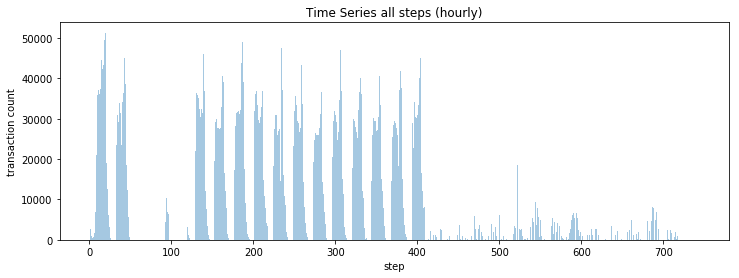

In [178]:
plt.figure(figsize=(12,4))
sns.distplot(df.step, kde=False, bins=744 )
plt.title('Time Series all steps (hourly)')
plt.ylabel('transaction count')

Text(0.5, 1.0, 'Time Series isFraud')

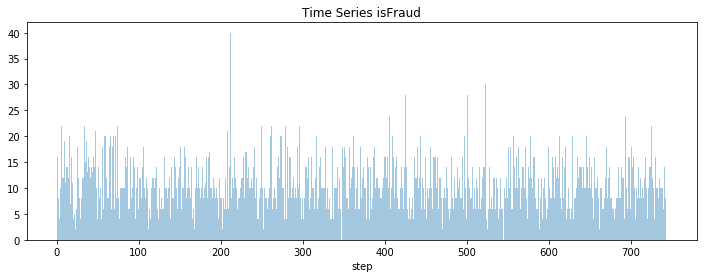

In [159]:
dffraud = df[df.isFraud == 1]
plt.figure(figsize=(12,4))
sns.distplot(dffraud.step, bins=743, kde=False)
plt.title('Time Series isFraud')
#plt.ylabel('transaction count')

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

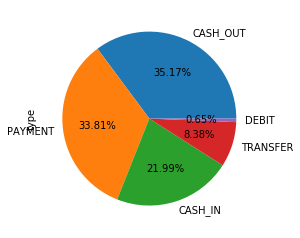

In [54]:
# Get count of unique values for "type" field and display pie chart distribution 
df.type.value_counts().plot.pie(autopct='%.2f%%')
df['type'].value_counts()

In [224]:
pd.crosstab(df.type, df.isFraud)

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [55]:
# Check the count of value zero "0" for "amount" column
# Investigate further how "0" could be the value for a transaction amount
zero_amount = df[df.amount == 0]
print('The ratio of zero values is ' + str(round(len(zero_amount)/len(df['amount']),6)*100) + '% or ' 
      + '{0:,.0f}'.format(len(zero_amount)) + ' of ' +'{0:,.0f}'.format(len(df['amount'])))

The ratio of zero values is 0.00030000000000000003% or 16 of 6,362,620


In [57]:
# Check the frequency stats from describe() for origin account
# The top frequency for any one account is 3
print(df['nameOrig'].describe())
print('The percentage of unique accounts is ' + '{0:,.4f}'.format((df['nameOrig'].nunique())/len(df['nameOrig'])*100) + ' or ' 
     + '{0:,.0f}'.format(len(df['nameOrig'])-df['nameOrig'].nunique()) + ' non-unique accounts out of ' + '{0:,.0f}'.format(len(df['nameOrig'])) )

count         6362620
unique        6353307
top       C1784010646
freq                3
Name: nameOrig, dtype: object
The percentage of unique accounts is 99.8536 or 9,313 non-unique accounts out of 6,362,620


In [58]:
# Check the count of value zero "0" for "oldbalanceOrg" column 
zero_oldbalanceOrg = df[df.oldbalanceOrg == 0]
print('The ratio of zero values is ' + str(round(len(zero_oldbalanceOrg)/len(df['oldbalanceOrg']),2)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_oldbalanceOrg)) + ' of ' +'{0:,.0f}'.format(len(df['oldbalanceOrg'])))

The ratio of zero values is 0.33 or 2,102,449 of 6,362,620


In [59]:
# Check the count of value zero "0" for a "newbalanceOrig" column
zero_newbalanceOrig = df[df.newbalanceOrig == 0]
print('The ratio of zero values is ' + str(round(len(zero_newbalanceOrig)/len(df['newbalanceOrig']),2)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_newbalanceOrig)) + ' of ' +'{0:,.0f}'.format(len(df['newbalanceOrig'])))

The ratio of zero values is 0.57 or 3,609,566 of 6,362,620


In [60]:
# Check the frequency stats from describe() for destination account, 
# Note the top frequency for destination accounts is 113, several accounts are used nearly as frequently
# And the number of unique accounts is nearly half the number of transactions
print(df['nameDest'].value_counts(sort=True).head(5))
print(df['nameDest'].value_counts(sort=True).tail(5))
print(df['nameDest'].describe())
print('The percentage of unique accounts is ' + '{0:,.4f}'.format((df['nameDest'].nunique())/len(df['nameDest'])*100) + ' or ' 
     + '{0:,.0f}'.format(len(df['nameDest'])-df['nameDest'].nunique()) + ' non-unique accounts out of ' + '{0:,.0f}'.format(len(df['nameDest'])) )

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
Name: nameDest, dtype: int64
M1634617414    1
M1067336007    1
M1816415501    1
M1786680731    1
C997821903     1
Name: nameDest, dtype: int64
count         6362620
unique        2722362
top       C1286084959
freq              113
Name: nameDest, dtype: object
The percentage of unique accounts is 42.7868 or 3,640,258 non-unique accounts out of 6,362,620


In [61]:
# Check the count of value zero "0" for "oldbalanceDest" column
zero_oldbalanceDest = df[df.oldbalanceDest == 0]
print('The ratio of zero values is ' + str(round(len(zero_oldbalanceDest)/len(df['oldbalanceDest']),2)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_oldbalanceDest)) + ' of ' +'{0:,.0f}'.format(len(df['oldbalanceDest'])))

The ratio of zero values is 0.43 or 2,704,388 of 6,362,620


In [62]:
# Check the count of value zero "0" for "newbalanceDest" column
zero_newbalanceDest = df[df.newbalanceDest == 0]
print('The ratio of zero values is ' + str(round(len(zero_newbalanceDest)/len(df['newbalanceDest']),2)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_newbalanceDest)) + ' of ' +'{0:,.0f}'.format(len(df['newbalanceDest'])))

The ratio of zero values is 0.38 or 2,439,433 of 6,362,620


The ratio of zero values is 0.998709 or 6,354,407 of 6,362,620
The number of isFraud cases is 8,213


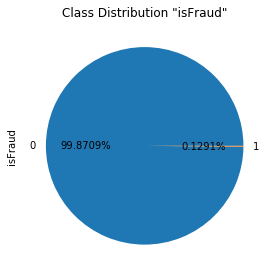

In [63]:
# Check the count of value zero "0" for "isFraud" column and show pie chart
# The zero is a boolean indicator, and represents a small percentage of the population
zero_isFraud = df[df.isFraud == 0]
print('The ratio of zero values is ' + str(round(len(zero_isFraud)/len(df['isFraud']),6)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_isFraud)) + ' of ' +'{0:,.0f}'.format(len(df['isFraud'])))
print('The number of isFraud cases is ' + '{0:,.0f}'.format(len(df['isFraud'])-len(zero_isFraud)))
df.isFraud.value_counts().plot.pie(autopct='%.4f%%')
plt.title('Class Distribution "isFraud"')
plt.tight_layout()

The ratio of zero values is 0.999997 or 6,362,604 of 6,362,620
The number of isFlaggedFraud cases is 16


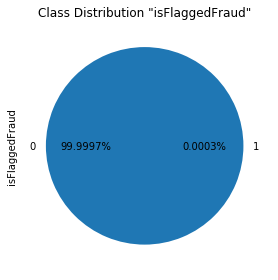

In [64]:
# Check the count of value zero "0" for "isFlaggedFraud" column
# The zero is a boolean indicator, and represents a small percentage of the population 
zero_isFlaggedFraud = df[df.isFlaggedFraud == 0]
print('The ratio of zero values is ' + str(round(len(zero_isFlaggedFraud)/len(df['isFlaggedFraud']),6)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_isFlaggedFraud)) + ' of ' +'{0:,.0f}'.format(len(df['isFlaggedFraud'])))
print('The number of isFlaggedFraud cases is ' + '{0:,.0f}'.format(len(df['isFlaggedFraud'])-len(zero_isFlaggedFraud)))
df.isFlaggedFraud.value_counts().plot.pie(autopct='%.4f%%')
plt.title('Class Distribution "isFlaggedFraud"')
plt.tight_layout()

In [65]:
# The isFlaggedFraud indicator coincides with the only zero amounts
zero_amount.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.00,C1510987794,0.00,0.00,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.00,C521393327,0.00,0.00,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.00,C539112012,0.00,0.00,C1106468520,"538,547.63","538,547.63",1,0
5563714,387,CASH_OUT,0.00,C1294472700,0.00,0.00,C1325541393,"7,970,766.57","7,970,766.57",1,0
5996408,425,CASH_OUT,0.00,C832555372,0.00,0.00,C1462759334,"76,759.90","76,759.90",1,0
5996410,425,CASH_OUT,0.00,C69493310,0.00,0.00,C719711728,"2,921,531.34","2,921,531.34",1,0
6168500,554,CASH_OUT,0.00,C10965156,0.00,0.00,C1493336195,"230,289.66","230,289.66",1,0
6205440,586,CASH_OUT,0.00,C1303719003,0.00,0.00,C900608348,"1,328,472.86","1,328,472.86",1,0
6266414,617,CASH_OUT,0.00,C1971175979,0.00,0.00,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.00,C2060908932,0.00,0.00,C1587892888,0.00,0.00,1,0


In [66]:
#Check isFraud 20 observations
nonzero_isFraud = df[df.isFraud == 1]
nonzero_isFraud.tail(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362600,742,TRANSFER,"652,993.91",C40604503,"652,993.91",0.00,C1166857907,0.00,0.00,1,0
6362601,742,CASH_OUT,"652,993.91",C1614818636,"652,993.91",0.00,C362803701,0.00,"652,993.91",1,0
6362602,742,TRANSFER,"1,819,543.69",C2089752665,"1,819,543.69",0.00,C112833674,0.00,0.00,1,0
6362603,742,CASH_OUT,"1,819,543.69",C1039979813,"1,819,543.69",0.00,C2078394828,0.00,"1,819,543.69",1,0
6362604,742,TRANSFER,"54,652.46",C1674778854,"54,652.46",0.00,C1930074465,0.00,0.00,1,0
6362605,742,CASH_OUT,"54,652.46",C43545501,"54,652.46",0.00,C830041824,0.00,"54,652.46",1,0
6362606,742,TRANSFER,"303,846.74",C959102961,"303,846.74",0.00,C114421319,0.00,0.00,1,0
6362607,742,CASH_OUT,"303,846.74",C1148860488,"303,846.74",0.00,C846260566,"343,660.89","647,507.63",1,0
6362608,742,TRANSFER,"258,355.42",C1226129332,"258,355.42",0.00,C1744173808,0.00,0.00,1,0
6362609,742,CASH_OUT,"258,355.42",C1113162093,"258,355.42",0.00,C797688696,"25,176.67","283,532.09",1,0


In [67]:
#Check isFraud all 16 observations
nonzero_isFlaggedFraud = df[df.isFlaggedFraud == 1]
nonzero_isFlaggedFraud.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,"4,953,893.08",C728984460,"4,953,893.08","4,953,893.08",C639921569,0.00,0.00,1,1
3247297,250,TRANSFER,"1,343,002.08",C1100582606,"1,343,002.08","1,343,002.08",C1147517658,0.00,0.00,1,1
3760288,279,TRANSFER,"536,624.41",C1035541766,"536,624.41","536,624.41",C1100697970,0.00,0.00,1,1
5563713,387,TRANSFER,"4,892,193.09",C908544136,"4,892,193.09","4,892,193.09",C891140444,0.00,0.00,1,1
5996407,425,TRANSFER,"10,000,000.00",C689608084,"19,585,040.37","19,585,040.37",C1392803603,0.00,0.00,1,1
5996409,425,TRANSFER,"9,585,040.37",C452586515,"19,585,040.37","19,585,040.37",C1109166882,0.00,0.00,1,1
6168499,554,TRANSFER,"3,576,297.10",C193696150,"3,576,297.10","3,576,297.10",C484597480,0.00,0.00,1,1
6205439,586,TRANSFER,"353,874.22",C1684585475,"353,874.22","353,874.22",C1770418982,0.00,0.00,1,1
6266413,617,TRANSFER,"2,542,664.27",C786455622,"2,542,664.27","2,542,664.27",C661958277,0.00,0.00,1,1
6281482,646,TRANSFER,"10,000,000.00",C19004745,"10,399,045.08","10,399,045.08",C1806199534,0.00,0.00,1,1


In [ ]:
# Check the histogram for all columns. Note the imbalanced nature of the data, meaning that there are very few fraud cases.
#df.hist(bins=50, figsize=(15,15), color = 'cyan')
df.hist()
plt.show()
plt.tight_layout()

In [ ]:
df2 = df
df2['M_nameDest'] = df2['nameDest'].str.startswith('M')
df2['M_nameOrig'] = df2['nameOrig'].str.startswith('M')
df2['C_nameDest'] = df2['nameDest'].str.startswith('C')
df2['C_nameOrig'] = df2['nameOrig'].str.startswith('C')
df2.head()

In [ ]:
print(df2['M_nameDest'].describe())
print(df2['M_nameOrig'].describe())
print(df2['C_nameDest'].describe())
print(df2['C_nameOrig'].describe())

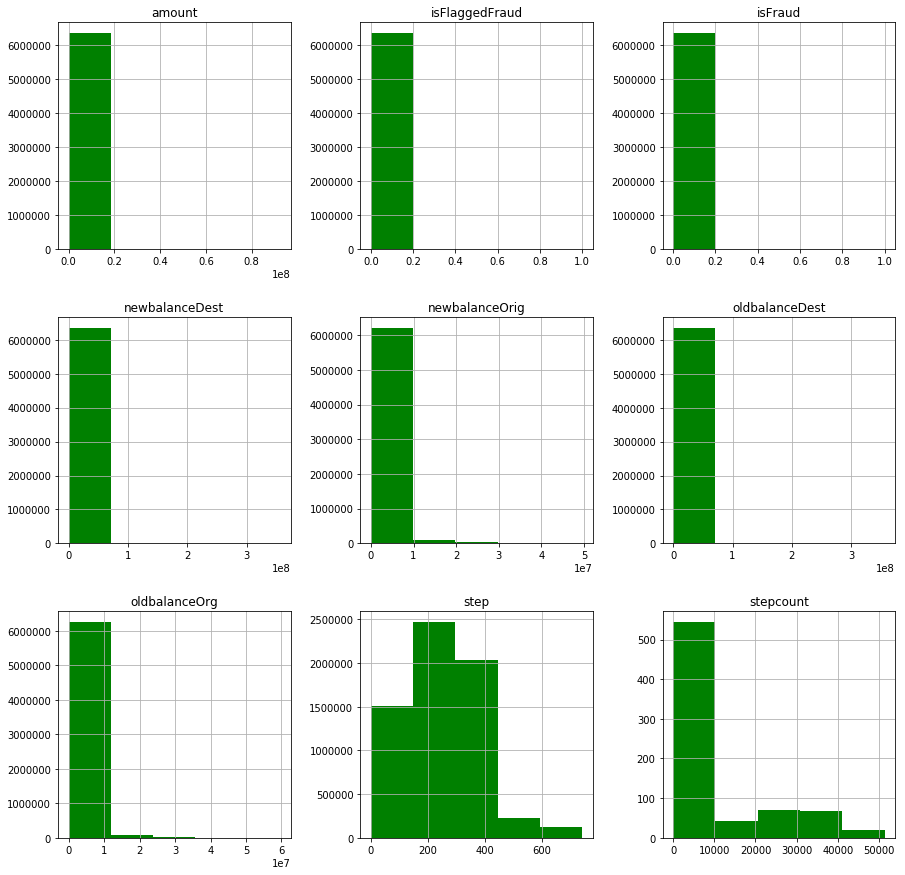

In [112]:
df.hist (bins=5, figsize=(15,15), color = 'green')
plt.show()

In [152]:
df718 = df[df.step > 718]
print(df718.describe())
df718notfraud = df718[df718.isFraud == 1]
print(len(df718notfraud))

        step        amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count 296.00        296.00         296.00          296.00          296.00   
mean  731.14  1,584,333.91   2,369,483.14      862,820.86      457,659.57   
std     7.06  2,767,853.81   6,633,547.40    4,975,757.99    1,466,041.41   
min   719.00          0.00           0.00            0.00            0.00   
25%   726.00    119,143.75     119,143.75            0.00            0.00   
50%   731.00    338,364.14     338,364.14            0.00            0.00   
75%   737.00  1,314,660.84   1,314,660.84            0.00      161,406.82   
max   743.00 10,000,000.00  57,316,255.05   47,316,255.05   11,436,080.11   

       newbalanceDest  isFraud  isFlaggedFraud  stepcount  
count          296.00   296.00          296.00       0.00  
mean     1,210,990.71     1.00            0.01        nan  
std      2,538,268.75     0.00            0.10        nan  
min              0.00     1.00            0.00        nan  
25%   

In [183]:
pd.to_datetime(df['step'][0])

Timestamp('1970-01-01 00:00:00.000000001')

In [217]:
#df['steptime'] = df['step'].apply(lambda x: pd.to_datetime(x, unit='h'))
#dffraud['steptime'] = dffraud['step'].apply(lambda x: pd.to_datetime(x, unit='h'))
dffraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,stepcount,steptime
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,"1,014.00",1970-01-01 01:00:00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0,552.00,1970-01-01 01:00:00
251,1,TRANSFER,"2,806.00",C1420196421,"2,806.00",0.00,C972765878,0.00,0.00,1,0,"35,269.00",1970-01-01 01:00:00
252,1,CASH_OUT,"2,806.00",C2101527076,"2,806.00",0.00,C1007251739,"26,202.00",0.00,1,0,"35,590.00",1970-01-01 01:00:00
680,1,TRANSFER,"20,128.00",C137533655,"20,128.00",0.00,C1848415041,0.00,0.00,1,0,22.00,1970-01-01 01:00:00


In [218]:
print(df.steptime.describe())
print(dffraud.steptime.describe())

count                 6362620
unique                    743
top       1970-01-01 19:00:00
freq                    51352
first     1970-01-01 01:00:00
last      1970-01-31 23:00:00
Name: steptime, dtype: object
count                    8213
unique                    741
top       1970-01-09 20:00:00
freq                       40
first     1970-01-01 01:00:00
last      1970-01-31 23:00:00
Name: steptime, dtype: object


In [193]:
df.step.describe()

count   6,362,620.00
mean          243.40
std           142.33
min             1.00
25%           156.00
50%           239.00
75%           335.00
max           743.00
Name: step, dtype: float64

In [198]:
df.steptime.dt.weekday_name.head()

0    Thursday
1    Thursday
2    Thursday
3    Thursday
4    Thursday
Name: steptime, dtype: object

In [219]:
df['dayofweek'] = pd.Categorical(df['steptime'].dt.weekday_name,
                                       ordered=True,
                                       categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
dffraud['dayofweek'] = pd.Categorical(dffraud['steptime'].dt.weekday_name,
                                       ordered=True,
                                       categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

C:\Users\19145\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [220]:
df['timeofday'] = df['steptime'].dt.hour + df['steptime'].dt.minute / 60
dffraud['timeofday'] = dffraud['steptime'].dt.hour + dffraud['steptime'].dt.minute / 60

C:\Users\19145\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


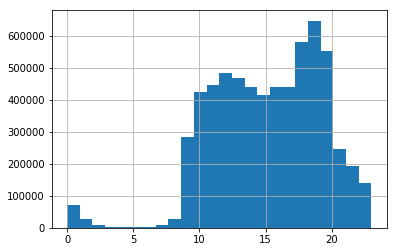

In [205]:
df.timeofday.hist(bins=24)

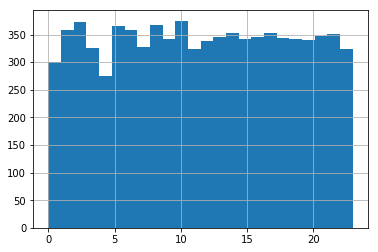

In [221]:
dffraud.timeofday.hist(bins=24)

In [211]:
df.dayofweek.value_counts()

Thursday     1528439
Friday       1308093
Tuesday       898274
Wednesday     857603
Saturday      854364
Sunday        527873
Monday        387974
Name: dayofweek, dtype: int64

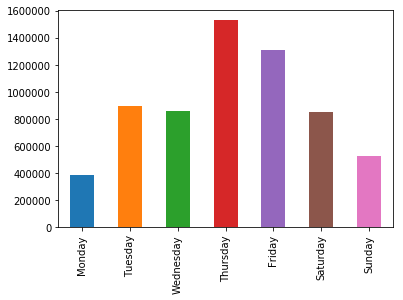

In [207]:
counts = df.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

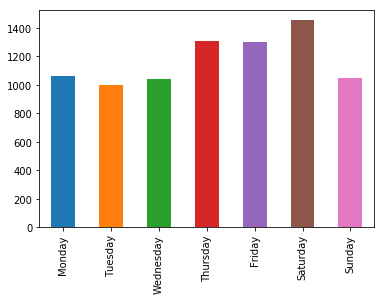

In [222]:
counts_f = dffraud.dayofweek.value_counts(sort=False)
counts_f.plot(kind='bar')

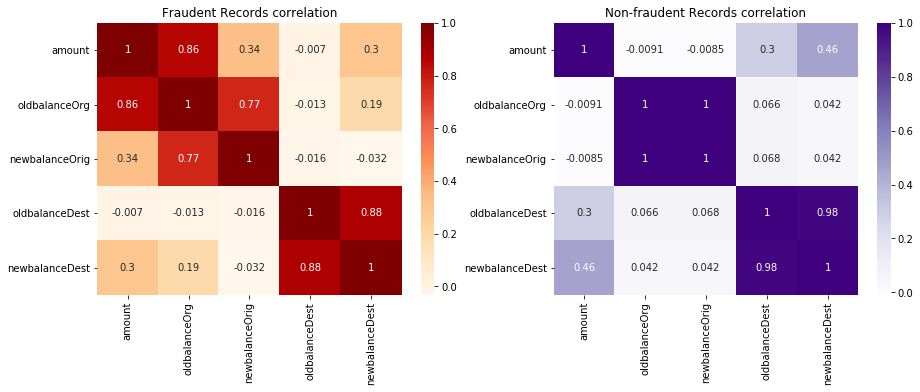

In [247]:
fig, ax = plt.subplots( 1,2, figsize=(15,5))

ax[0].set_title("Fraudent Records correlation")
sns.heatmap(df.query('isFraud == 1').drop(['isFraud', 'isFlaggedFraud', 'stepcount', 'timeofday', 'step'],1).corr(),  cmap="OrRd", ax=ax[0], annot=True)
#sns.heatmap(df.query('isFraud == 1').drop(['isFraud', 'isFlaggedFraud'],1).corr(),  cmap="OrRd", ax=ax[0], annot=True)

ax[1].set_title("Non-fraudent Records correlation")
#sns.heatmap(df.drop(['isFraud', 'isFlaggedFraud'],1).corr(),  cmap="Purples", ax=ax[1], annot=True)
sns.heatmap(df.query('isFraud == 0').drop(['isFraud', 'isFlaggedFraud', 'stepcount', 'timeofday', 'step'],1).corr(),  cmap="Purples", ax=ax[1], annot=True)
#sns.heatmap(df.query('isFraud == 0').drop(['isFraud', 'isFlaggedFraud'],1).corr(),  cmap="Purples", ax=ax[1], annot=True)
plt.show()

#ax[2].set_title("All Records correlation")
#sns.heatmap(df.query.drop(['isFraud', 'isFlaggedFraud'],1).corr(), ax=ax[2], annot=True)
#plt.show()

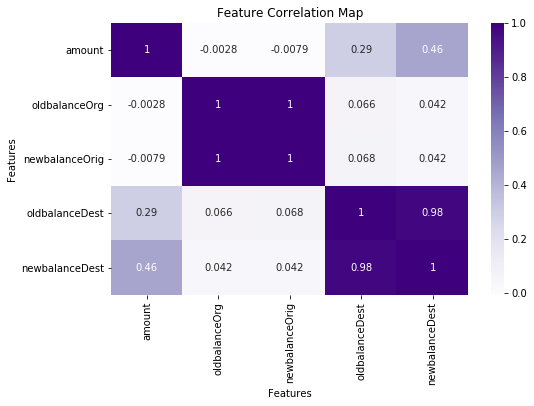

In [252]:
plt.figure(figsize=(8,5))
#sns.heatmap(df.select_dtypes(['int','float']).corr(), 
#            cmap=plt.cm.Purples, annot=True);
sns.heatmap(df.drop(['isFraud', 'isFlaggedFraud', 'stepcount', 'timeofday', 'step'],1).corr(), annot=True, cmap="Purples")
plt.title('Feature Correlation Map');
plt.ylabel('Features')
plt.xlabel('Features')
plt.xticks(rotation='vertical');

Text(0, 0.5, 'Target (Fraud = 1, Not Fraud=0)')

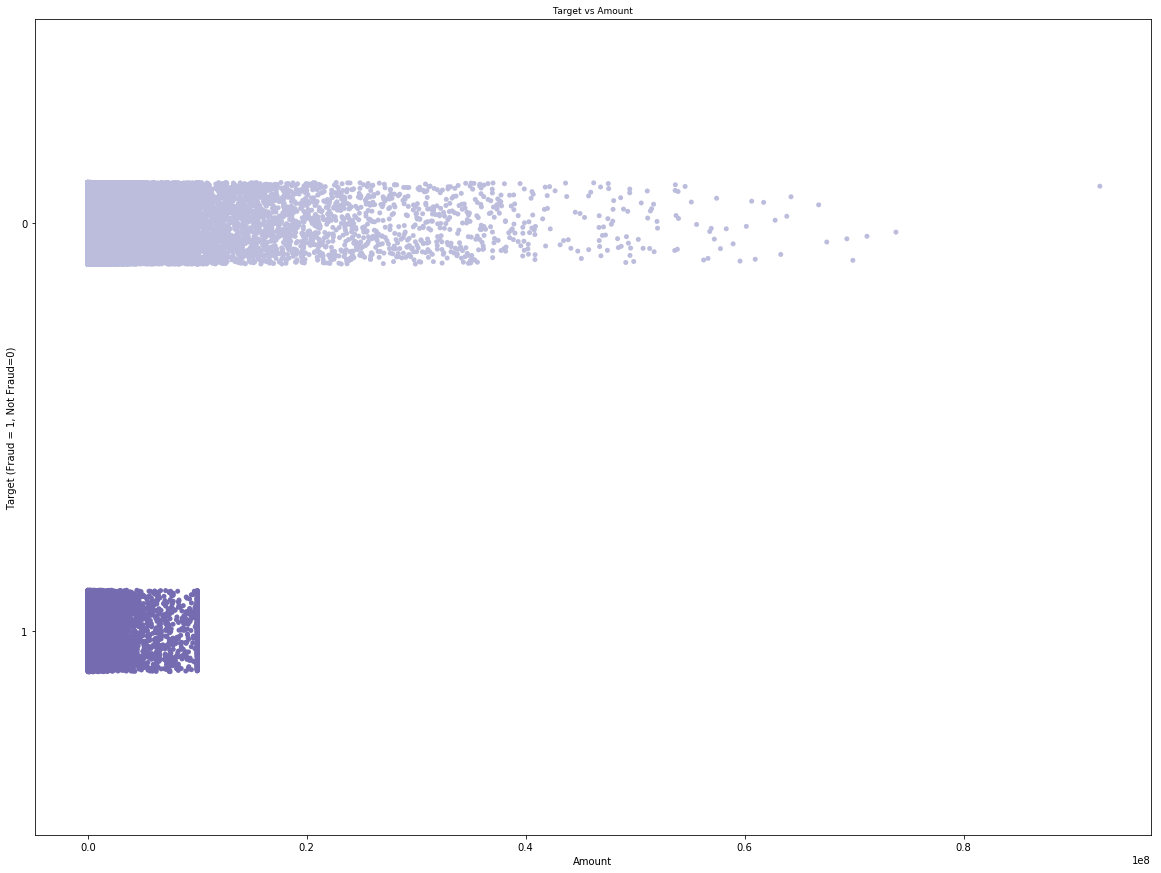

In [254]:
plt.figure(figsize=(20,15))
sns.stripplot(x=df["amount"], y=df['isFraud'].astype('category'),
             palette=['#bcbddc','#756bb1']);
plt.title('Target vs Amount', fontsize=9)
plt.xlabel('Amount',)
plt.ylabel('Target (Fraud = 1, Not Fraud=0)',)